# 2D Fourier Transform

In [3]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
images = [ cv2.imread("./data/00{}.jpg".format(i), cv2.IMREAD_GRAYSCALE) for i in range(1, 7)] 
cv2.imshow("i", images[1])
cv2.waitKey(0)

13

## Matrix Multiplication

In [328]:
class Matrix:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return self.data.__repr__()
    
    def __getitem__(self, i):
        return self.data[i]
    
    def __truediv__(self, denom):
        div_mat = self.zeros()
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                div_mat[i][j] = self[i][j] / denom 
        return Matrix(div_mat)
    
    def __len__(self):
        return len(self.data), len(self.data[0])
    @property 
    def zeros(self):
        return Matrix([[0 for _ in range(self.shape[1])] for _ in range(self.shape[0])])
    
    @property
    def shape(self):
        return (len(self.data), len(self.data[0]))
    
    def round(self, n=8):
        rounded = self.zeros
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                re = self.data[i][j].real
                im = self.data[i][j].imag
                if im == 0:
                    rounded[i][j] = round(re, n)
                else:
                    rounded[i][j] = round(re, n) + round(im, n) * 1j
        return Matrix(rounded)
        
    
    def matmul(self, B):
        result = [[0 for _ in range(B.shape[1])] for _ in range(self.shape[0])]
        for i in range(self.shape[0]):
            for j in range(B.shape[1]):
                sum = 0
                for k in range(self.shape[1]):
                    sum += self[i][k] * B[k][j]
                result[i][j] = sum 
        return Matrix(result)
    
    @property
    def transpose(self):
        result = [[0 for _ in range(self.shape[0])] for _ in range(self.shape[1])]
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                result[j][i] = self[i][j]
                
    @property
    def exp_mu(self):
        M = self.shape[0]
        result = [[0 for _ in range(M)] for _ in range(M)]
        for u in range(M):
            for m in range(M):
                result[m][u] = np.exp(-2j* np.pi * m * u / M )
        return Matrix(result)
    @property
    def exp_nu(self):
        N = self.shape[1]
        result = [[0 for _ in range(N)] for _ in range(N)]
        for v in range(N):
            for n in range(N):
                result[n][v] = np.exp(-2j* np.pi * n * v / N )
        return Matrix(result)
    
    def re_im(self):
        re = self.zeros
        im = self.zeros
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                re[i][j] = self[i][j].real
                im[i][j] = self[i][j].imag
        return Matrix(re), Matrix(im) 
    
    @property
    def magnitude(self):
        mag = self.zeros
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                mag[i][j] = abs(self[i][j])
        return Matrix(mag)
    
A = Matrix([[1, 2, 3], [4, 5, 6]])
B = Matrix([[1, 2], [3, 4], [5, 6]])

## 2D Fourier Transform

In [329]:
def fourier_2d(img: Matrix): 
    M, N = img.shape 
    fourier = img.exp_mu.matmul(img).matmul(img.exp_nu) 
    fourier.round()
    return fourier

In [330]:
img = Matrix(images[0])
fft_img = fourier_2d(img)
mag_fft = fft_img.magnitude

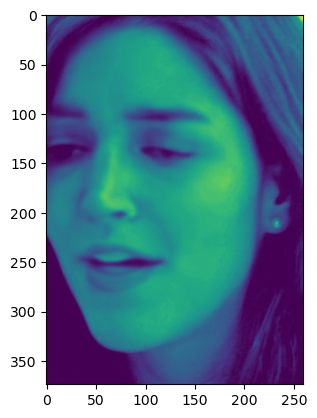

In [331]:
plt.imshow(images[0])

In [344]:
fft_shifted = np.fft.fftshift(fft_img.data)

In [350]:
fft_mag = np.abs(fft_shifted)
fft_rounded = np.round(fft_mag, 0)

In [351]:
fft_rounded

array([[ 73.,  95.,  89., ...,  10.,  89.,  95.],
       [ 84.,  59.,  75., ...,  49.,  96., 220.],
       [190.,  64., 120., ...,  46.,  13.,  81.],
       ...,
       [167.,  95., 115., ...,  73.,  26.,  41.],
       [190.,  81.,  13., ...,  66., 120.,  64.],
       [ 84., 220.,  96., ...,  73.,  75.,  59.]])